In [23]:
!pip3 install matplotlib

In [24]:
from Bio import Entrez
Entrez.email   = "mi.garcia.sejas@gmail.com"
Entrez.api_key = "82f49b5c0af810da4323f50093d1148b5d08"

In [25]:
! pip3 install pandas

In [26]:
!pip3 install pandas
!pip3 install pycirclize
!pip3 install pyrodigal
!pip3 install requests
!pip3 install seaborn
!pip3 install biopython

In [44]:
!pip3 install biopython

In [27]:
import pandas as pd

In [59]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pyrodigal
import requests
import seaborn as sns
import subprocess
import sys
from Bio import SeqIO
from Bio import Entrez
from io                 import StringIO
from matplotlib.patches import Patch
from pycirclize         import Circos
from pycirclize.parser  import Gff
from requests.adapters  import HTTPAdapter, Retry

In [ ]:
#1. Obtención de una secuencia genómica 

In [29]:
accession = "CP008959.1"
genome = Entrez.efetch(db="nucleotide",
                       id=accession,
                       format="gb",
                       rettype="text")
record = SeqIO.read(genome, "genbank")
genome_length = len(record.seq)

In [30]:
genome_length

4539435

In [ ]:
### 2. Predicción de genes usando pyrodigal

In [32]:
orf_finder = pyrodigal.OrfFinder()
orf_finder.train(bytes(record.seq))
orf_genes  = orf_finder.find_genes(bytes(record.seq))

In [ ]:
#propiedades: traducción a secuencias aminoacídicas y las posiciones de las regiones codificantes

In [33]:
aa_file = accession + ".faa"
prefix  = "Micoisaxdr"
with open(aa_file, "w") as orf_gene:
    orf_genes.write_translations(orf_gene,sequence_id=prefix)

In [34]:
! type CP008959.1.faa


>Micoisaxdr_1 # 148 # 3834 # -1 # ID=1_1;partial=00;start_type=GTG;rbs_motif=None;rbs_spacer=None;gc_cont=0.705
MTTQTLIRLILGMSMTAVVGVFALRRVWWLYKLVMSGQPASGRTDNLGTRIWTQISEVLG
QRRLLKWSIPGLAHFFTMWGFFILLTVYIEAYGLLFEERFHIPVIGRWDALGFLQDFFAT
AVFLGITTFAIIRILRNPREIGRSSRFYGSHNGGAWLVLLMIFNVIWTYVLVRGSAVNNG
TLPYGNGAFLSQLFGAILRPLGQPANEIIETTALLLHIGVMLAFLILVLHSKHLHIFLAP
INVTFKRLPDGLGPLLPLEADGKPIDFENPSEDAVFGRGKIEDFTWKGMLDFATCTECGR
CQSQCPAWNTGKPLSPKLVIMDLRDHWMAKAPYILGQKDASAGGEAGHQEHHHVPESGFG
RVPGHGPEQATRPLVGTEEQGGVIDPDVLWSCVTCGACVEQCPVDIEHVDHIVDMRRYQV
MMESEFPSELSVLFKNLETKGNPWGQNASDRTNWIDEVDFDVPVYGQDVDSFDGYEYLFW
VGCAGAYDDKAKKTTKAVAELLAVAGVKYLVLGAGETCNGDSARRSGNEFLFQQLAQQAV
ETLDGLFEGVETVDRKIVVTCPHCFNTIGKEYRQLGANYTVLHHTQLLNRLVRDKRLVPV
TPVSQDITYHDPCYLGRHNKVYEAPRELIGAAGASLTEMPRHADRSFCCGAGGARMWMEE
HIGKRINHERVDEALATDATAIATACPFCRVMVTDGVNDRQEEAGRSGVEVLDVAQVLLG
SLDHDKAQLPAKGTAAKQAQERAPKAAPKAAAPVTPVEAPAEAPQAPAPAAPAAPVKGLG
MAAGAKRPGAKKAAPTPAAPAAPAAPVKGLGIAAGAKRPGAKKTPPPAPGLXXXXXXXXX
XXXXXXXXXXXXXXXXXXXXXXXXXXXGVPCEPA

In [ ]:
#Almacenar las cordenas en el archico gff

In [35]:
gff_file = accession + ".gff"
prefix  = "Micoisaxdr"
with open(gff_file, "w") as orf_gene:
    orf_genes.write_gff(orf_gene,sequence_id=prefix)

In [36]:
! type CP008959.1.gff

##gff-version  3
# Sequence Data: seqnum=1;seqlen=4539435;seqhdr="Micoisaxdr"
# Model Data: version=pyrodigal.v2.1.0;run_type=Single;model="Ab initio";gc_cont=62.99;transl_table=11;uses_sd=1
Micoisaxdr	pyrodigal_v2.1.0	CDS	148	3834	327.2	-	0	ID=Micoisaxdr_1;partial=00;start_type=GTG;rbs_motif=None;rbs_spacer=None;gc_cont=0.705;conf=99.99;score=327.17;cscore=331.40;sscore=-4.23;rscore=-3.25;uscore=0.80;tscore=-1.78;
Micoisaxdr	pyrodigal_v2.1.0	CDS	3943	6393	222.4	-	0	ID=Micoisaxdr_2;partial=00;start_type=GTG;rbs_motif=None;rbs_spacer=None;gc_cont=0.680;conf=99.99;score=222.41;cscore=227.13;sscore=-4.73;rscore=-3.25;uscore=0.96;tscore=-1.78;
Micoisaxdr	pyrodigal_v2.1.0	CDS	6627	7166	30.4	+	0	ID=Micoisaxdr_3;partial=00;start_type=GTG;rbs_motif=AGGAG;rbs_spacer=5-10bp;gc_cont=0.656;conf=99.91;score=30.36;cscore=18.17;sscore=12.19;rscore=14.04;uscore=-0.06;tscore=-1.78;
Micoisaxdr	pyrodigal_v2.1.0	CDS	7355	8794	108.1	+	0	ID=Micoisaxdr_4;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_sp

In [ ]:
# 3. Obtención de un set de secuencias de referencia

In [38]:
uniprot_api_url  = "https://rest.uniprot.org/uniprotkb/stream"
uniprot_api_args = {"compressed" : "false",
                    "format"     : "fasta",
                    "query"      : "(antibiotic biosynthesis) AND (reviewed:true)"}
uniprot_ref_seqs = requests.get(uniprot_api_url,params=uniprot_api_args).text

In [ ]:
# pasamos las secuencias en formato fasta a un archivo (uniprot_sequences.fasta) en nuestro disco duro

In [39]:
uniprot_seqs_file = open("uniprot_sequences.fasta", "wt")
uniprot_seqs_file.write(uniprot_ref_seqs)
uniprot_seqs_file.close()

In [40]:
! type uniprot_sequences.fasta

>sp|A0A075TMP8|PATI_PENEN Cytochrome P450 monooxygenase patI OS=Penicillium expansum OX=27334 GN=patI PE=1 SV=1
MDILQLAPTHLLAILLSSTSALFLITYLLRAGHRPSDLPNGPPTVPLFGNELQVPKSDAH
FQFSRWAKEYGGFFTLKRYNNTTIVISDQKLIKTLLDKKSNIYSHRPASLVSHLITQSDH
LLVMQYGERWRMLRKTIHQYFMEPRCERDHWKVQEAEAKQMLHDYLTMPEDHMLHPKRYS
NSITNSLVFGIRTKTVHDEYMKKLFYLMDKWSLVQELGATPPVDSFALLRYVPQWMLGNW
RNRAVEVGDLMQSLYQTVLDQVKERRQRGIQRDSFMDRVLDTLKQTPLSENELRFLGGVL
MEGGSDTSSSLILTIIQAMTKYPEVQAKAHAQIDSIIGHNRSPAWSDWSKLPYINMIIKE
SHRWRPVSPLGVPHAVAEDDHIDGKLIPQGSSIVLNVWGMHHDSDRWQEPEHFQPERFAD
FPALASGYAGSERRDHLGYGAGRRICPGIHLAERNLIIGIAKLLWAFEFLEPLGSDSDIS
AHSGASKGFLHCPKDYGCVIRLRSPEKRETIMREFAEAQEVFARFD
>sp|A0A075TRC0|PATK_PENEN 6-methylsalicylic acid synthase OS=Penicillium expansum OX=27334 GN=patK PE=1 SV=1
MHSVSPSTYPSGGTSPAPADTPGTEYSEYEFSNDVAVVGMACRVAGGNHNPELLWQSLLS
QKSAVGEIPEMRWEPYYRRDPRNAKELKKTTSRGYFLDRLEDFDCQFFGISPKEAEQMDP
QQRVSLEVASEALEDAGIPAKSLSGSDTAVFWGVNSDDYSKLVLEDLPNVEAWMGIGTAY
CGVPNRISYHLNLMGPSTAVDAACASSLVAVHHGVQAIRLGESQVAIVGGVNALCGPGLT


In [ ]:
# 4. Creación de una base de datos tipo BLAST

In [81]:
import subprocess

In [97]:
makeblastdb_path = "/Users/dell/Desktop/WBDS/ncbi-blast-2.13.0+/bin/makeblastdb"
makeblastdb_command = [makeblastdb_path,'-in', aa_file ,'-dbtype','prot']
subprocess.call(makeblastdb_command)


0

In [61]:
from Bio.Blast.Applications import NcbiblastxCommandline

In [ ]:
# 5. Obtención de secuencias de interés en el genoma analizado

In [99]:
blastp_path       = "/Users/dell/Desktop/WBDS/ncbi-blast-2.13.0+/bin/blastp"
blastp_out_format = "6 qseqid sseqid qlen slen qstart sstart qend send score evalue length positive"
blastp_out_file   = accession + ".blast.tsv"
blastp_command    = [blastp_path,
                     "-db",          aa_file,
                     "-query",       "uniprot_sequences.fasta",
                     "-evalue",      "1e-9",
                     "-out",         blastp_out_file,
                     "-outfmt",      blastp_out_format,
                     "-num_threads", "12"]
subprocess.call(blastp_command)


0

In [ ]:
! type 

In [101]:
! type CP008959.1.blast.tsv

sp|A0A075TMP8|PATI_PENEN	Micoisaxdr_901	526	462	299	270	469	432	175	2.68e-14	171	79
sp|A0A075TMP8|PATI_PENEN	Micoisaxdr_1184	526	437	286	223	464	396	144	1.33e-10	181	84
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2518	1776	1877	35	104	1774	1836	2110	0.0	1792	894
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2521	1776	1406	30	33	975	960	1438	2.08e-172	956	515
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_1050	1776	1976	35	9	975	948	1406	7.74e-164	955	508
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_3729	1776	2003	40	1	975	934	1351	3.38e-156	945	497
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2519	1776	1538	27	27	846	844	1310	1.66e-153	828	459
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2519	1776	1538	1202	935	1771	1494	247	1.10e-21	607	245
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2528	1776	2112	35	8	1027	1016	1286	3.83e-147	1019	519
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_2528	1776	2112	1371	1722	1774	2100	220	1.80e-18	417	186
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_678	1776	1976	32	6	975	949	1279	9.21e-147	964	511
sp|A0A075TRC0|PATK_PENEN	Micoisaxdr_

In [ ]:
# 6. Examinación de los resultados de la búsqueda tipo BLAST

In [102]:
blastp_column_names = blastp_out_format.split(" ")[1:]
blastp_df = pd.read_csv(blastp_out_file,sep="\t",names=blastp_column_names)

In [103]:
blastp_df

qseqid           sseqid  qlen  slen  qstart  sstart  \
0     sp|A0A075TMP8|PATI_PENEN   Micoisaxdr_901   526   462     299     270   
1     sp|A0A075TMP8|PATI_PENEN  Micoisaxdr_1184   526   437     286     223   
2     sp|A0A075TRC0|PATK_PENEN  Micoisaxdr_2518  1776  1877      35     104   
3     sp|A0A075TRC0|PATK_PENEN  Micoisaxdr_2521  1776  1406      30      33   
4     sp|A0A075TRC0|PATK_PENEN  Micoisaxdr_1050  1776  1976      35       9   
...                        ...              ...   ...   ...     ...     ...   
8538     sp|W6R1D9|AC891_PENRF  Micoisaxdr_1073   707   463     255      23   
8539     sp|W6R1D9|AC891_PENRF   Micoisaxdr_553   707   504     255     157   
8540     sp|W6R1D9|AC891_PENRF  Micoisaxdr_3460   707   508     255     170   
8541      sp|P9WJ95|INIC_MYCTU     Micoisaxdr_6   493   494       1       1   
8542      sp|P9WJ97|INIB_MYCTU     Micoisaxdr_4   479   480       1       1   

      qend  send  score         evalue  length  positive  
0      469   432    175   2.680000e-14     171        79  
1      464   396    144   1.330000e-10     181        84  
2     1774  1836   2110   0.000000e+00    1792       894  
3      975   960   1438  2.080000e-172     956       515  
4      975   948   1406  7.740000e-164     955       508  
...    ...   ...    ...            ...     ...       ...  
8538   700   449    327   3.790000e-33     458       197  
8539   570   419    212   1.610000e-18     322       132  
8540   583   440    178   1.990000e-14     333       131  
8541   493   493   2512   0.000000e+00     493       493  
8542   479   479   2243   0.000000e+00     479       479  

[8543 rows x 12 columns]

In [104]:
candidate_genes=blastp_df["sseqid"].unique().tolist()
len(candidate_genes)

629

In [ ]:
# Para visualizar preliminarmente empezaremos con Transformar nuestro archivo gff en un dataframe

In [106]:
gff_columns     = ["chr","source","feature_type","start","end","score","strand","phase","info"]
gff_df          = pd.read_csv(gff_file,sep="\t",comment="#",header=None,names=gff_columns)
gff_df["start"] = gff_df["start"].astype(int)
gff_df["end"]   = gff_df["end"].astype(int)

In [ ]:
#Luego obtendremos la información adicional del dataframe gff_df

In [107]:
def get_gff_info(info_str):
    out_dict = {}
    info_arr = info_str.split(";")
    for line in info_arr:
        if "=" in line:
            line_arr    = line.split("=")
            field_name  = line_arr[0]
            field_value = line_arr[1]
            out_dict[field_name] = field_value
    return out_dict

In [108]:
gff_df["annotation"] = gff_df["info"].apply(lambda x: get_gff_info(x))

In [111]:
gff_df

chr            source feature_type    start      end  score  \
0     Micoisaxdr  pyrodigal_v2.1.0          CDS      148     3834  327.2   
1     Micoisaxdr  pyrodigal_v2.1.0          CDS     3943     6393  222.4   
2     Micoisaxdr  pyrodigal_v2.1.0          CDS     6627     7166   30.4   
3     Micoisaxdr  pyrodigal_v2.1.0          CDS     7355     8794  108.1   
4     Micoisaxdr  pyrodigal_v2.1.0          CDS     8831    10753  221.9   
...          ...               ...          ...      ...      ...    ...   
4208  Micoisaxdr  pyrodigal_v2.1.0          CDS  4497021  4499576  304.1   
4209  Micoisaxdr  pyrodigal_v2.1.0          CDS  4499685  4516685  295.3   
4210  Micoisaxdr  pyrodigal_v2.1.0          CDS  4517146  4518552  133.6   
4211  Micoisaxdr  pyrodigal_v2.1.0          CDS  4518881  4538278  316.4   
4212  Micoisaxdr  pyrodigal_v2.1.0          CDS  4538359  4539435   95.6   

     strand  phase                                               info  \
0         -      0  ID=Micoisaxdr_1;partial=00;start_type=GTG;rbs_...   
1         -      0  ID=Micoisaxdr_2;partial=00;start_type=GTG;rbs_...   
2         +      0  ID=Micoisaxdr_3;partial=00;start_type=GTG;rbs_...   
3         +      0  ID=Micoisaxdr_4;partial=00;start_type=ATG;rbs_...   
4         +      0  ID=Micoisaxdr_5;partial=00;start_type=ATG;rbs_...   
...     ...    ...                                                ...   
4208      -      0  ID=Micoisaxdr_4209;partial=00;start_type=GTG;r...   
4209      -      0  ID=Micoisaxdr_4210;partial=00;start_type=GTG;r...   
4210      -      0  ID=Micoisaxdr_4211;partial=00;start_type=TTG;r...   
4211      -      0  ID=Micoisaxdr_4212;partial=00;start_type=GTG;r...   
4212      -      0  ID=Micoisaxdr_4213;partial=01;start_type=Edge;...   

                                             annotation candidate  
0     {'ID': 'Micoisaxdr_1', 'partial': '00', 'start...   exclude  
1     {'ID': 'Micoisaxdr_2', 'partial': '00', 'start...   exclude  
2     {'ID': 'Micoisaxdr_3', 'partial': '00', 'start...   exclude  
3     {'ID': 'Micoisaxdr_4', 'partial': '00', 'start...   include  
4     {'ID': 'Micoisaxdr_5', 'partial': '00', 'start...   include  
...                                                 ...       ...  
4208  {'ID': 'Micoisaxdr_4209', 'partial': '00', 'st...   exclude  
4209  {'ID': 'Micoisaxdr_4210', 'partial': '00', 'st...   exclude  
4210  {'ID': 'Micoisaxdr_4211', 'partial': '00', 'st...   exclude  
4211  {'ID': 'Micoisaxdr_4212', 'partial': '00', 'st...   exclude  
4212  {'ID': 'Micoisaxdr_4213', 'partial': '01', 'st...   exclude  

[4213 rows x 11 columns]

In [ ]:
# Posteriormente filtramos los datos para incluir solamente los genes identificados como asociados a la biosíntesis de antibióticos

In [109]:
gff_df["candidate"] = gff_df["annotation"].apply(lambda x: "include" if x["ID"] in candidate_genes else "exclude")

In [114]:
gff_df

chr            source feature_type    start      end  score  \
0     Micoisaxdr  pyrodigal_v2.1.0          CDS      148     3834  327.2   
1     Micoisaxdr  pyrodigal_v2.1.0          CDS     3943     6393  222.4   
2     Micoisaxdr  pyrodigal_v2.1.0          CDS     6627     7166   30.4   
3     Micoisaxdr  pyrodigal_v2.1.0          CDS     7355     8794  108.1   
4     Micoisaxdr  pyrodigal_v2.1.0          CDS     8831    10753  221.9   
...          ...               ...          ...      ...      ...    ...   
4208  Micoisaxdr  pyrodigal_v2.1.0          CDS  4497021  4499576  304.1   
4209  Micoisaxdr  pyrodigal_v2.1.0          CDS  4499685  4516685  295.3   
4210  Micoisaxdr  pyrodigal_v2.1.0          CDS  4517146  4518552  133.6   
4211  Micoisaxdr  pyrodigal_v2.1.0          CDS  4518881  4538278  316.4   
4212  Micoisaxdr  pyrodigal_v2.1.0          CDS  4538359  4539435   95.6   

     strand  phase                                               info  \
0         -      0  ID=Micoisaxdr_1;partial=00;start_type=GTG;rbs_...   
1         -      0  ID=Micoisaxdr_2;partial=00;start_type=GTG;rbs_...   
2         +      0  ID=Micoisaxdr_3;partial=00;start_type=GTG;rbs_...   
3         +      0  ID=Micoisaxdr_4;partial=00;start_type=ATG;rbs_...   
4         +      0  ID=Micoisaxdr_5;partial=00;start_type=ATG;rbs_...   
...     ...    ...                                                ...   
4208      -      0  ID=Micoisaxdr_4209;partial=00;start_type=GTG;r...   
4209      -      0  ID=Micoisaxdr_4210;partial=00;start_type=GTG;r...   
4210      -      0  ID=Micoisaxdr_4211;partial=00;start_type=TTG;r...   
4211      -      0  ID=Micoisaxdr_4212;partial=00;start_type=GTG;r...   
4212      -      0  ID=Micoisaxdr_4213;partial=01;start_type=Edge;...   

                                             annotation candidate  
0     {'ID': 'Micoisaxdr_1', 'partial': '00', 'start...   exclude  
1     {'ID': 'Micoisaxdr_2', 'partial': '00', 'start...   exclude  
2     {'ID': 'Micoisaxdr_3', 'partial': '00', 'start...   exclude  
3     {'ID': 'Micoisaxdr_4', 'partial': '00', 'start...   include  
4     {'ID': 'Micoisaxdr_5', 'partial': '00', 'start...   include  
...                                                 ...       ...  
4208  {'ID': 'Micoisaxdr_4209', 'partial': '00', 'st...   exclude  
4209  {'ID': 'Micoisaxdr_4210', 'partial': '00', 'st...   exclude  
4210  {'ID': 'Micoisaxdr_4211', 'partial': '00', 'st...   exclude  
4211  {'ID': 'Micoisaxdr_4212', 'partial': '00', 'st...   exclude  
4212  {'ID': 'Micoisaxdr_4213', 'partial': '01', 'st...   exclude  

[4213 rows x 11 columns]

In [ ]:
# Y finalmente almacenamos los resultados en un nuevo archivo gff para que pyCirclize visualice unicamente los genes de interés

In [110]:
candidate_df = gff_df.copy()
candidate_df = candidate_df[candidate_df["candidate"]=="include"][gff_columns]
candidate_df.to_csv("candidates.gff",sep="\t",header=False,index=False)

In [113]:
! type candidates.gff

Micoisaxdr	pyrodigal_v2.1.0	CDS	7355	8794	108.1	+	0	ID=Micoisaxdr_4;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.702;conf=100.00;score=108.06;cscore=104.12;sscore=3.93;rscore=1.82;uscore=-1.29;tscore=4.06;
Micoisaxdr	pyrodigal_v2.1.0	CDS	8831	10753	221.9	+	0	ID=Micoisaxdr_5;partial=00;start_type=ATG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.635;conf=99.99;score=221.94;cscore=214.35;sscore=7.59;rscore=1.82;uscore=0.84;tscore=4.06;
Micoisaxdr	pyrodigal_v2.1.0	CDS	10750	12231	179.0	+	0	ID=Micoisaxdr_6;partial=00;start_type=GTG;rbs_motif=GGA/GAG/AGG;rbs_spacer=5-10bp;gc_cont=0.676;conf=99.99;score=178.99;cscore=177.28;sscore=1.72;rscore=1.82;uscore=0.39;tscore=-1.78;
Micoisaxdr	pyrodigal_v2.1.0	CDS	68633	69853	186.9	+	0	ID=Micoisaxdr_57;partial=00;start_type=ATG;rbs_motif=GGAG/GAGG;rbs_spacer=5-10bp;gc_cont=0.653;conf=99.99;score=186.91;cscore=175.38;sscore=11.53;rscore=6.18;uscore=-0.70;tscore=4.06;
Micoisaxdr	pyrodigal_v2.1.0	CDS	75959	77188	173.6	-

In [ ]:
# Ahora si!! llegamos a la visualización de los datos con pyCirclize

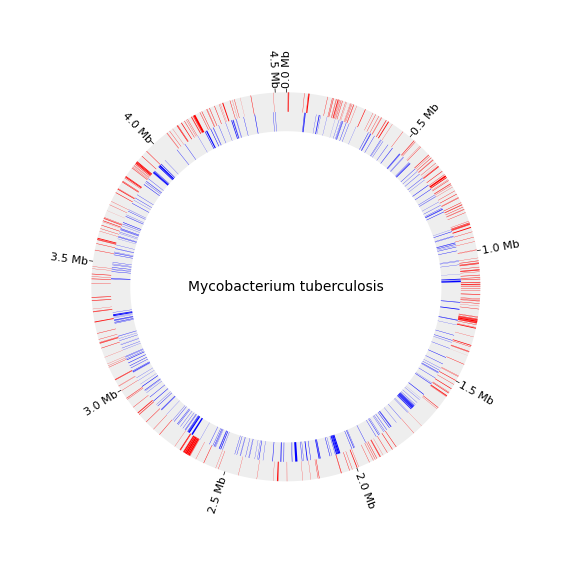

In [117]:
circos = Circos(sectors={accession: genome_length})
circos.text("Mycobacterium tuberculosis") 
circos_gff = Gff(gff_file="candidates.gff")
sector = circos.get_sector(accession)
sector = circos.sectors[0]
cds_track = sector.add_track((80, 100))
cds_track.axis(fc="#EEEEEE", ec="none")
cds_track.genomic_features(circos_gff.extract_features("CDS", target_strand =  1), r_lim=(90, 100),fc="red" )
cds_track.genomic_features(circos_gff.extract_features("CDS", target_strand = -1), r_lim=(80,  90),fc="blue")
pos_list, labels = [], []
cds_track.xticks_by_interval(
    interval=500000,
    label_formatter=lambda label_value: f"{label_value/ 1000000:.1f} Mb",
    label_orientation="vertical")
fig = circos.plotfig().set_figwidth(5)

In [ ]:
# SI lo queremos hacer más detallado seaborn podría ser de utilidad.

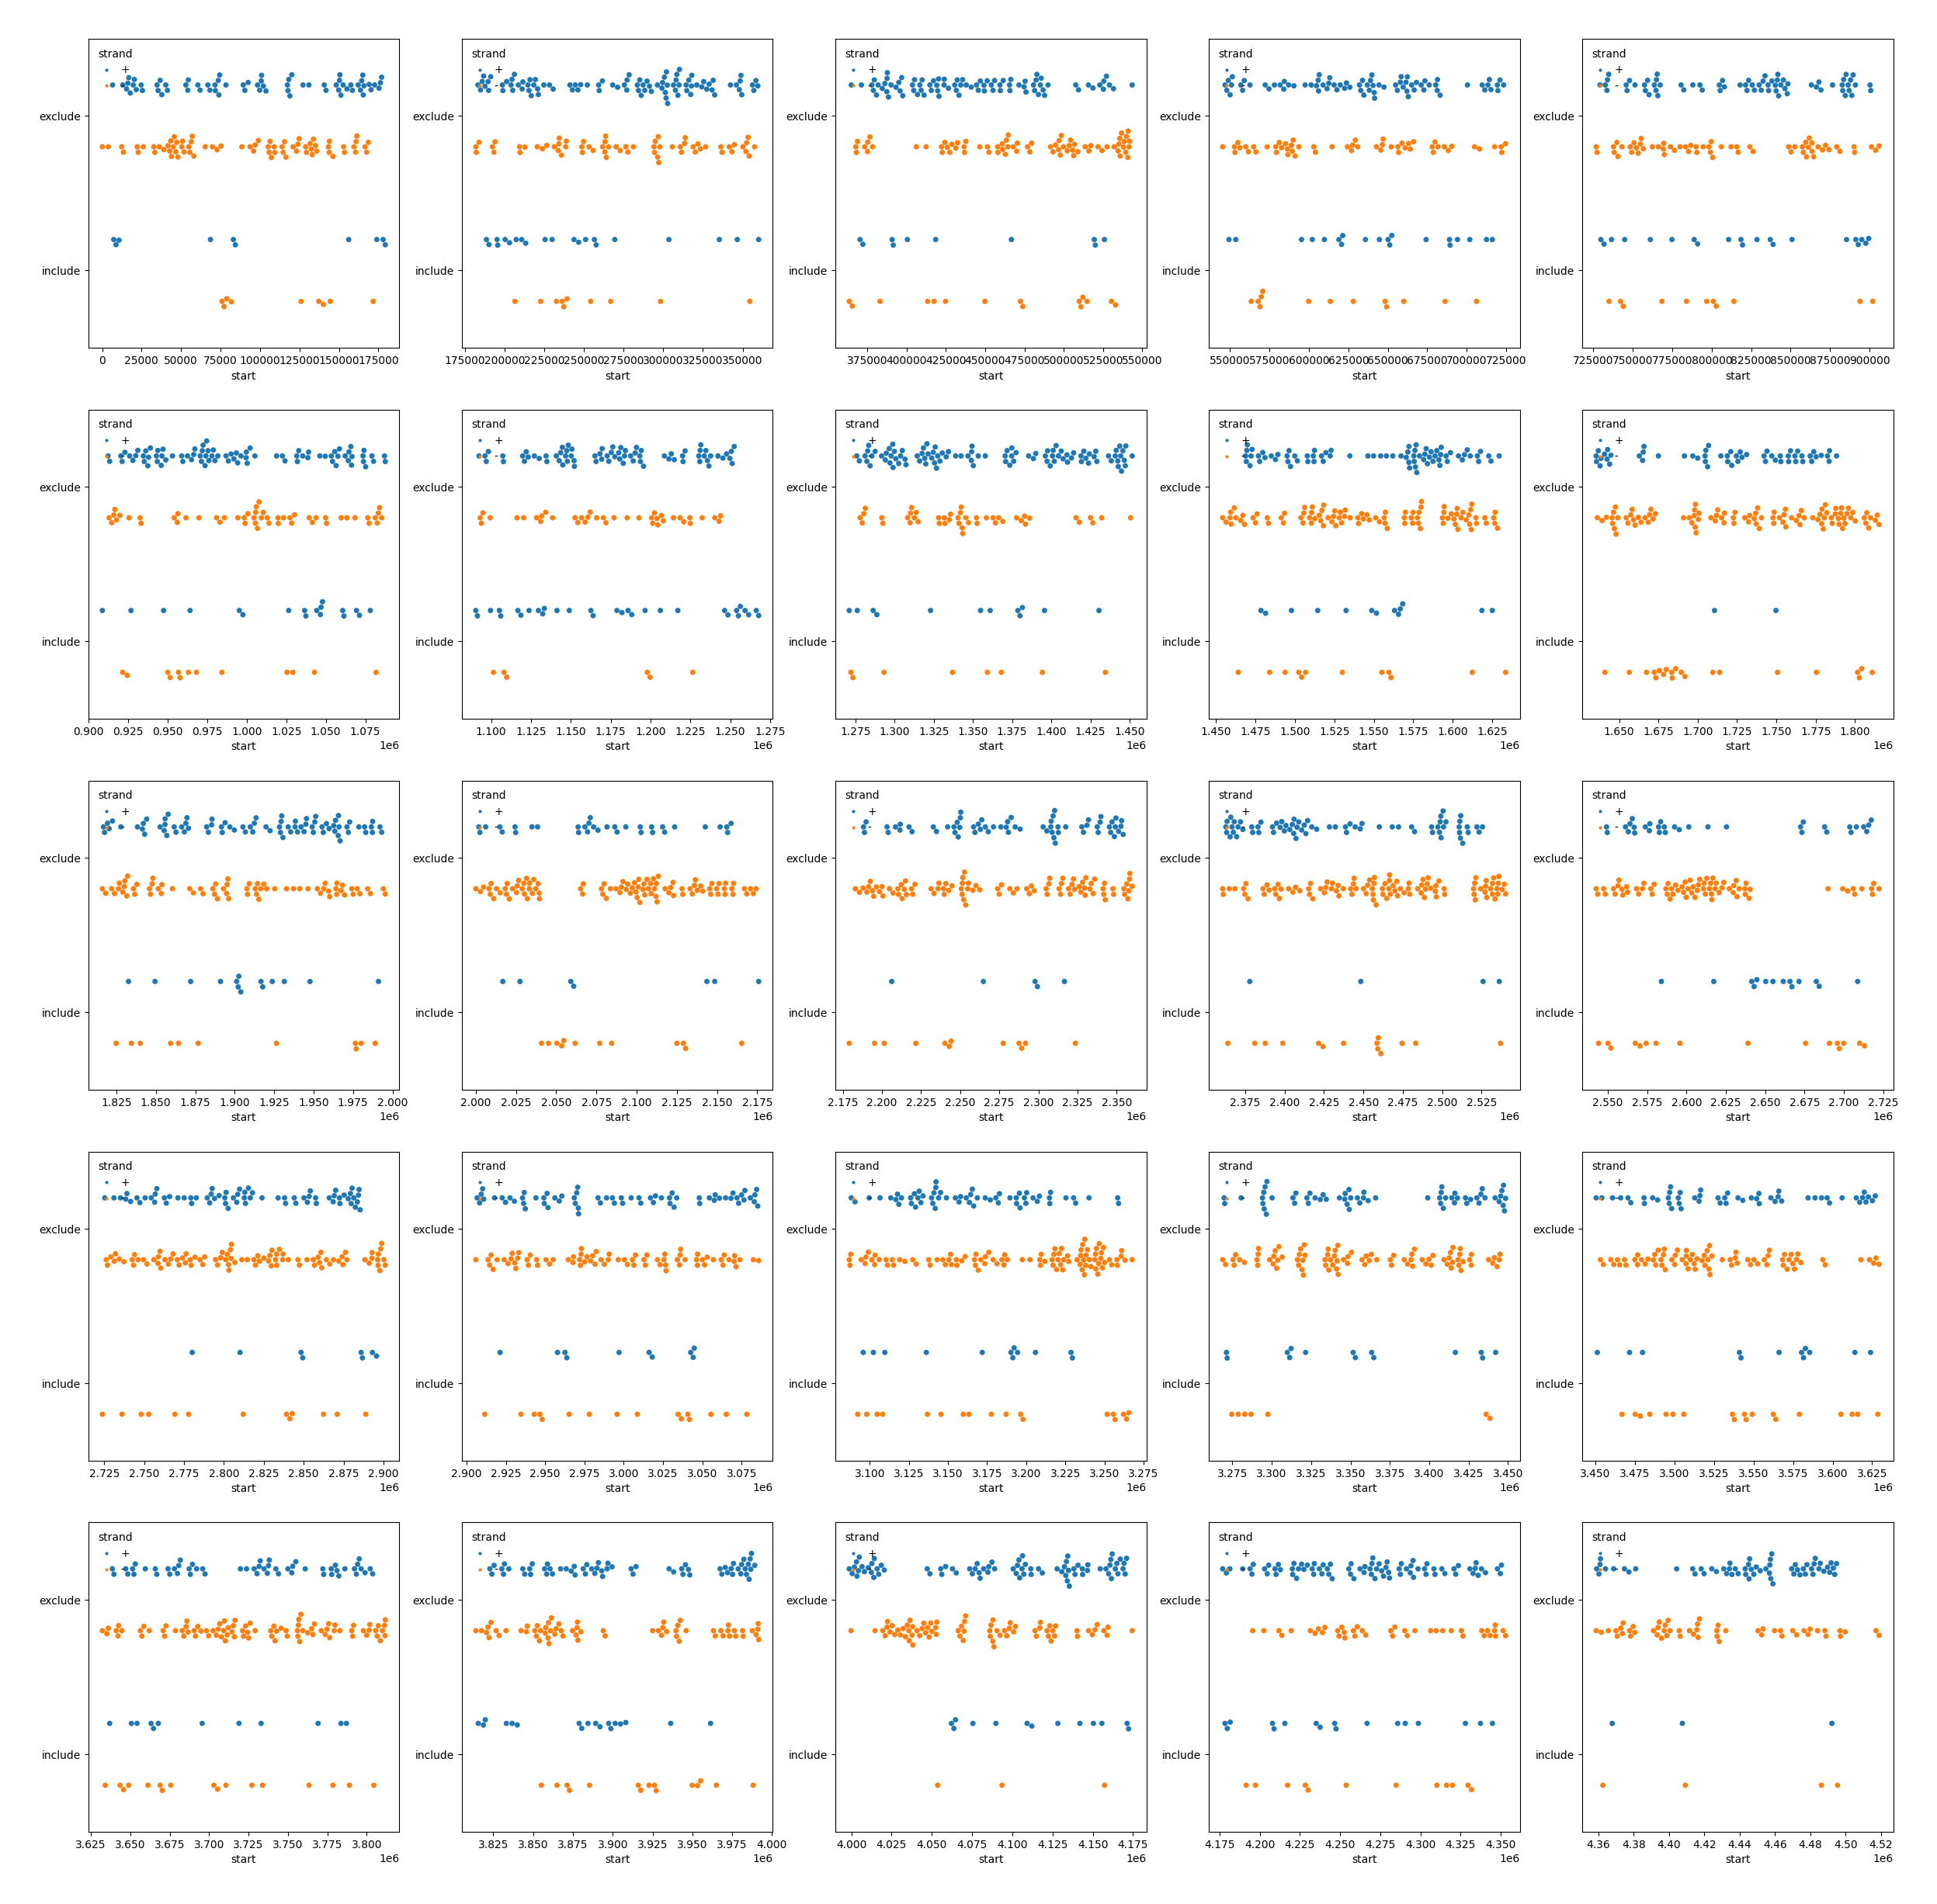

In [118]:
num_bins = 25
counter_1 = 0
counter_2 = 0
fig, axes = plt.subplots(5,5,figsize=(30,30))
bin_len  = (genome_length - (genome_length % (num_bins - 1))) / (num_bins)
for bin_num in range(num_bins):
    start_pos = bin_num * bin_len
    end_pos   = (bin_num + 1) * bin_len
    mb_df = gff_df.copy()
    mb_df = mb_df[(mb_df["start"]>start_pos) & (mb_df["end"]<=end_pos)]
    sns.swarmplot(ax = axes[counter_1,counter_2],data = mb_df,y="candidate",x="start",hue="strand",dodge=True,order=["exclude","include"],hue_order=["+","-"])
    axes[counter_1,counter_2].set(ylabel=None)
    counter_2 += 1
    if (counter_2%5 == 0):
        counter_2 = 0
        counter_1 += 1
plt.show()

In [ ]:
# 7. Examinación detallada del operón seleccionado

In [119]:
operon_df = gff_df.copy()
operon_df = operon_df[(operon_df["start"]     >= 3350000) &
                      (operon_df["end"]       <= 3450000) &
                      (operon_df["strand"]    == "-")     &
                      (operon_df["candidate"] == "include")]
operon_df.reset_index(drop=True, inplace=True)

In [136]:
len(operon_df)

2

In [120]:
operon_gene_list = []
for index in operon_df.index.tolist():
    gene_id = operon_df["annotation"][index]["ID"]
    operon_gene_list.append(gene_id)

In [137]:
operon_gene_list

['Micoisaxdr_3252', 'Micoisaxdr_3254']

In [121]:
query_str = ""

In [122]:
for record in SeqIO.parse(aa_file, "fasta"):
    seq_id  = record.id
    if(seq_id in operon_gene_list):
        seq_str = str(record.seq)
        query_str+=">"+seq_id+"\n"+seq_str+"\n"
query_str = query_str.replace("*","")

In [ ]:
# Para enviar a InterProScan, para el analisis de las proteinas conservadas preparamos las secuencias sin "*" y en formato fasta


In [123]:
for record in SeqIO.parse(aa_file, "fasta"):
    seq_id  = record.id
    if(seq_id in operon_gene_list):
        seq_str = str(record.seq)
        query_str+=">"+seq_id+"\n"+seq_str+"\n"
query_str = query_str.replace("*","")

In [139]:
submit_url   = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/run"
progress_url = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/status"
results_url  = "https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result"

In [140]:
submit_headers   = {"Accept":"text/plain"}
progress_headers = {"Accept":"text/plain"}
results_headers  = {"Accept":"text/tab-separated-values"}

In [ ]:
# Para ello, construiremos un diccionario de python que adjuntaremos a requests para buscar los dominios funcionales

In [141]:
submit_data = {"email":"mi.garcia.sejas@gmail.com",
               "title":"operon_335_345",
               "goterms":"false",
               "pathways":"false",
               "stype":"p",
               "sequence":query_str}

In [ ]:
# ya casi, ya casi terminamos y realizar el envio...

In [142]:
submit_request = requests.post(submit_url,data=submit_data,headers=submit_headers)

In [143]:
submit_status_code = submit_request.status_code
submit_job_id      = submit_request.text

In [144]:
print(submit_status_code)
print(submit_job_id)

200
iprscan5-R20230323-000258-0864-36749154-p1m


In [ ]:
# Para ver nuestro progreso del análisis de las secuencias, todo esta OK!

In [145]:
progress_request     = requests.get(progress_url+"/"+submit_job_id,headers=progress_headers)
progress_status_code = progress_request.status_code
progress_status      = progress_request.text
print(progress_status_code)
print(progress_status)

200
RUNNING


In [ ]:
# Obtención de los resultados

In [146]:
results_log_request = requests.get(results_url+"/"+submit_job_id+"/log",headers=results_headers)
results_tsv_request = requests.get(results_url+"/"+submit_job_id+"/tsv",headers=results_headers)

In [147]:
print(results_log_request.text)

22/03/2023 23:57:31:395 Welcome to InterProScan-5.61-93.0
22/03/2023 23:57:31:396 Running InterProScan v5 in STANDALONE mode... on Linux
22/03/2023 23:57:38:213 RunID: hh-wp-01-14.ebi.ac.uk_20230322_235737912_dgrn
22/03/2023 23:57:50:275 Loading file /nfs/public/rw/es/projects/wp-jdispatcher/logs/prod/sources/jobs/iprscan5/rest/20230323/0002/iprscan5-R20230323-000258-0864-36749154-p1m.sequence
22/03/2023 23:57:50:277 Running the following analyses:
[AntiFam-7.0,CDD-3.20,Coils-2.2.1,FunFam-4.3.0,Gene3D-4.3.0,Hamap-2021_04,MobiDBLite-2.0,PANTHER-17.0,Pfam-35.0,Phobius-1.01,PIRSF-3.10,PIRSR-2021_05,PRINTS-42.0,ProSitePatterns-2022_05,ProSiteProfiles-2022_05,SFLD-4,SignalP_EUK-4.1,SignalP_GRAM_NEGATIVE-4.1,SignalP_GRAM_POSITIVE-4.1,SMART-9.0,SUPERFAMILY-1.75,TIGRFAM-15.0,TMHMM-2.0c]
Available matches will be retrieved from the pre-calculated match lookup service.

Matches for any sequences that are not represented in the lookup service will be calculated locally.
22/03/2023 23:57:52:307 27

In [ ]:
# Examinamos nuestros dominios conservados

In [148]:
results_tsv_str = StringIO(results_tsv_request.text)
results_column_names = ["sequence","md5","length","database","accession","description","start","end","evalue","post_processed","date","entry","name"]
results_df = pd.read_csv(results_tsv_str,sep="\t",names=results_column_names)

In [149]:
results_df

sequence                               md5  length  \
0   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
1   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
2   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
3   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
4   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
5   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
6   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
7   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
8   Micoisaxdr_3252  b3121ce8fdc69fdef4afb5bf013d421d     501   
9   Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
10  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
11  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
12  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
13  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
14  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
15  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
16  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
17  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
18  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
19  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
20  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
21  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
22  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
23  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
24  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
25  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   
26  Micoisaxdr_3254  a683e79ff917a17f7f2c18e6d8dfcb6f     612   

           database                    accession  \
0               CDD                      cd00688   
1       SUPERFAMILY                     SSF48239   
2           PANTHER                    PTHR31739   
3            Gene3D             G3DSA:1.50.10.20   
4       SUPERFAMILY                     SSF48239   
5              Pfam                      PF00432   
6            FunFam  G3DSA:1.50.10.160:FF:000004   
7              Pfam                      PF13243   
8            Gene3D            G3DSA:1.50.10.160   
9   ProSitePatterns                      PS00802   
10           Gene3D            G3DSA:3.40.50.920   
11              CDD                      cd02007   
12             Pfam                      PF02779   
13            SMART                      SM00861   
14  ProSitePatterns                      PS00801   
15             Pfam                      PF13292   
16             Pfam                      PF13292   
17      SUPERFAMILY                     SSF52922   
18           Gene3D            G3DSA:3.40.50.970   
19           FunFam  G3DSA:3.40.50.970:FF:000010   
20            Hamap                     MF_00315   
21      SUPERFAMILY                     SSF52518   
22              CDD                      cd07033   
23           Gene3D            G3DSA:3.40.50.970   
24      SUPERFAMILY                     SSF52518   
25             Pfam                      PF02780   
26          PANTHER                    PTHR43322   

                                        description  start  end       evalue  \
0                                   ISOPREN_C2_like    269  473  2.23218E-12   
1     Terpenoid cyclases/Protein prenyltransferases     17  100      2.15E-7   
2   ENT-COPALYL DIPHOSPHATE SYNTHASE, CHLOROPLASTIC    386  454      4.5E-49   
3                                                 -    267  489      3.6E-22   
4     Terpenoid cyclases/Protein prenyltransferases    216  480      5.3E-26   
5     Prenyltransferase and squalene oxidase repeat     40   56         0.02   
6                          Type B diterpene cyclase     19  236          0.0   
7         Squalene-hopene cyclase C-terminal domain    338  422       1.3E-7   
8            